### Loading required libraries

In [5]:
# importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import warnings
warnings.filterwarnings("ignore")




### Loading the data

In [6]:
# loading the data
df=pd.read_csv("Loan.csv")

In [7]:
# loading top 5 observation of this dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,...,last_fico_range_low,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
0,0,1077501.0,1296599.0,5000.0,5000.0,4975.0,162.87,B,B2,Other,...,740.0,1.0,INDIVIDUAL,0.0,0.0,0.0,36.0,10.65,10.0,83.7
1,1,1077430.0,1314167.0,2500.0,2500.0,2500.0,59.83,C,C4,Ryder,...,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,60.0,15.27,0.0,9.4
2,2,1077175.0,1313524.0,2400.0,2400.0,2400.0,84.33,C,C5,Other,...,715.0,1.0,INDIVIDUAL,0.0,0.0,0.0,36.0,15.96,10.0,98.5
3,3,1076863.0,1277178.0,10000.0,10000.0,10000.0,339.31,C,C1,AIR RESOURCES BOARD,...,600.0,1.0,INDIVIDUAL,0.0,0.0,0.0,36.0,13.49,10.0,21.0
4,4,1075358.0,1311748.0,3000.0,3000.0,3000.0,67.79,B,B5,University Medical Group,...,690.0,1.0,INDIVIDUAL,0.0,0.0,0.0,60.0,12.69,1.0,53.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9062 entries, 0 to 9061
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               9062 non-null   int64  
 1   id                       9061 non-null   float64
 2   member_id                9061 non-null   float64
 3   loan_amnt                9061 non-null   float64
 4   funded_amnt              9061 non-null   float64
 5   funded_amnt_inv          9061 non-null   float64
 6   installment              9061 non-null   float64
 7   grade                    9061 non-null   object 
 8   sub_grade                9061 non-null   object 
 9   emp_title                9061 non-null   object 
 10  home_ownership           9061 non-null   object 
 11  annual_inc               9061 non-null   float64
 12  verification_status      9061 non-null   object 
 13  issue_d                  9061 non-null   object 
 14  loan_status             

### Data Cleaning


In [9]:
# we need to remove unwanted columns
df.drop(["Unnamed: 0","id","member_id","funded_amnt","funded_amnt_inv","policy_code","issue_d","zip_code","initial_list_status","last_pymnt_d","last_credit_pull_d","out_prncp","out_prncp_inv"],axis=1,inplace=True)

In [10]:
df.shape

(9062, 40)

In [11]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
count,9061.000000,9061.000000,9.061000e+03,9061.000000,9061.000000,9061.000000,9061.000000,9061.000000,9061.000000,9061.000000,...,9061.000000,9061.000000,9061.000000,9061.0,9061.0,9061.000000,9061.000000,9061.000000,9061.000000,9061.000000
mean,12946.901556,366.404155,7.036331e+04,14.006263,0.133429,713.543759,717.543759,0.850458,9.487584,0.044145,...,3374.784213,689.982342,677.680720,0.0,0.0,0.037965,44.049443,12.441322,5.215649,53.079787
std,8486.110242,225.984237,4.882190e+04,6.591922,0.462463,34.836119,34.836119,1.036123,4.251631,0.208628,...,5317.494991,78.690305,115.771496,0.0,0.0,0.192274,11.331693,4.250717,3.611097,27.499318
min,1000.000000,22.240000,6.000000e+03,0.000000,0.000000,660.000000,664.000000,0.000000,2.000000,0.000000,...,0.010000,0.000000,0.000000,0.0,0.0,0.000000,36.000000,5.420000,0.000000,0.000000
25%,6000.000000,195.440000,4.200000e+04,8.980000,0.000000,685.000000,689.000000,0.000000,6.000000,0.000000,...,282.700000,644.000000,640.000000,0.0,0.0,0.000000,36.000000,8.900000,2.000000,31.400000
50%,11700.000000,325.740000,6.000000e+04,14.070000,0.000000,710.000000,714.000000,1.000000,9.000000,0.000000,...,708.500000,699.000000,695.000000,0.0,0.0,0.000000,36.000000,12.420000,5.000000,55.700000
75%,17600.000000,483.380000,8.500000e+04,19.150000,0.000000,740.000000,744.000000,1.000000,12.000000,0.000000,...,4392.470000,744.000000,740.000000,0.0,0.0,0.000000,60.000000,15.270000,10.000000,75.600000
max,35000.000000,1288.100000,1.782000e+06,29.920000,6.000000,825.000000,829.000000,8.000000,34.000000,2.000000,...,36115.200000,850.000000,845.000000,0.0,0.0,2.000000,60.000000,24.110000,10.000000,99.900000


In [12]:
df.nunique()

loan_amnt                   624
installment                3876
grade                         7
sub_grade                    35
emp_title                  7463
home_ownership                3
annual_inc                 1564
verification_status           3
loan_status                   6
pymnt_plan                    1
purpose                      13
title                      3755
addr_state                   45
dti                        2573
delinq_2yrs                   7
fico_range_low               34
fico_range_high              34
inq_last_6mths                9
open_acc                     33
pub_rec                       3
revol_bal                  7665
total_acc                    62
total_pymnt                8132
total_pymnt_inv            8345
total_rec_prncp            2597
total_rec_int              8059
total_rec_late_fee          349
recoveries                 1119
collection_recovery_fee     951
last_pymnt_amnt            8400
last_fico_range_high         72
last_fic

In [13]:
# checking numeric cols in this dataset

numeric_cols=df.select_dtypes(include="number").columns
numeric_cols

Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'term_months', 'int_rate_%', 'emp_length_year',
       'revol_util_%'],
      dtype='object')

In [14]:
# shape of numeric columns in this dataset
numeric_cols.shape

(29,)

In [15]:
# checking how many object cols are there in this dataset
cat_col=df.select_dtypes("object").columns
cat_col

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'application_type'],
      dtype='object')

In [16]:
# shape of object columns 
cat_col.shape

(11,)

In [17]:
# Data Cleaning
# checking for the null values
df.isnull().sum()

loan_amnt                  1
installment                1
grade                      1
sub_grade                  1
emp_title                  1
home_ownership             1
annual_inc                 1
verification_status        1
loan_status                1
pymnt_plan                 1
purpose                    1
title                      1
addr_state                 1
dti                        1
delinq_2yrs                1
fico_range_low             1
fico_range_high            1
inq_last_6mths             1
open_acc                   1
pub_rec                    1
revol_bal                  1
total_acc                  1
total_pymnt                1
total_pymnt_inv            1
total_rec_prncp            1
total_rec_int              1
total_rec_late_fee         1
recoveries                 1
collection_recovery_fee    1
last_pymnt_amnt            1
last_fico_range_high       1
last_fico_range_low        1
application_type           1
acc_now_delinq             1
delinq_amnt   

In [18]:
df.head()

,loan_amnt,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_fico_range_high,last_fico_range_low,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
0,5000.0,162.87,B,B2,Other,RENT,24000.0,Verified,Fully Paid,n,...,744.0,740.0,INDIVIDUAL,0.0,0.0,0.0,36.0,10.65,10.0,83.7
1,2500.0,59.83,C,C4,Ryder,RENT,30000.0,Source Verified,Charged Off,n,...,499.0,0.0,INDIVIDUAL,0.0,0.0,0.0,60.0,15.27,0.0,9.4
2,2400.0,84.33,C,C5,Other,RENT,12252.0,Not Verified,Fully Paid,n,...,719.0,715.0,INDIVIDUAL,0.0,0.0,0.0,36.0,15.96,10.0,98.5
3,10000.0,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,Fully Paid,n,...,604.0,600.0,INDIVIDUAL,0.0,0.0,0.0,36.0,13.49,10.0,21.0
4,3000.0,67.79,B,B5,University Medical Group,RENT,80000.0,Source Verified,Current,n,...,694.0,690.0,INDIVIDUAL,0.0,0.0,0.0,60.0,12.69,1.0,53.9


In [19]:
# checking for duplicates values
df.drop_duplicates(keep="first",inplace=True)

##### Exploring target column

In [20]:
df['loan_status'].value_counts()


Fully Paid            7103
Charged Off           1418
Current                513
In Grace Period         16
Late (31-120 days)       6
Late (16-30 days)        5
Name: loan_status, dtype: int64

In [21]:
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]


In [22]:
df.shape

(8521, 40)

In [23]:
df['loan_status'].value_counts()


Fully Paid     7103
Charged Off    1418
Name: loan_status, dtype: int64

### Data visulization

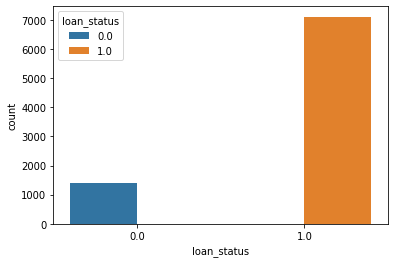

In [67]:
sns.countplot(data=df,x="loan_status",hue="loan_status")
plt.show()

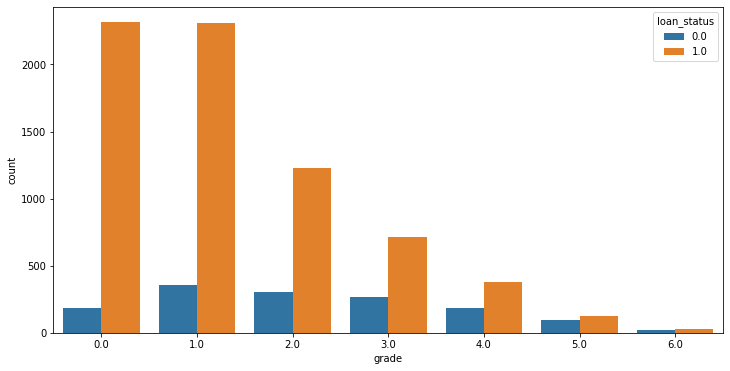

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="grade",hue=("loan_status"))

plt.show()

<Axes: xlabel='installment', ylabel='Count'>

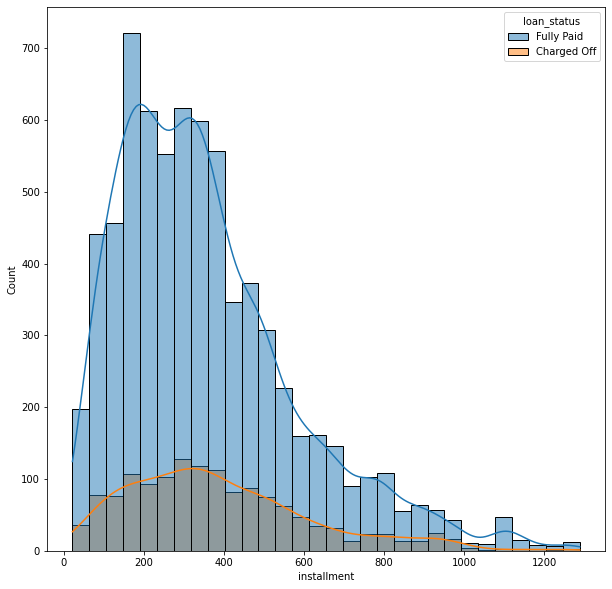

In [26]:
fig = plt.figure(figsize=(10, 10))

sns.histplot(data=df, x="installment", bins=30, kde=True, hue="loan_status")


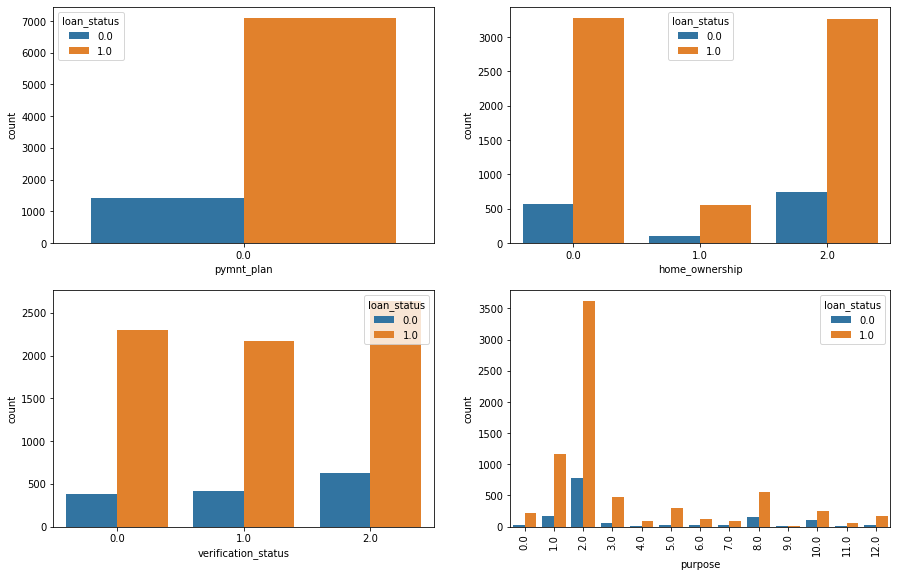

In [66]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='pymnt_plan', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);


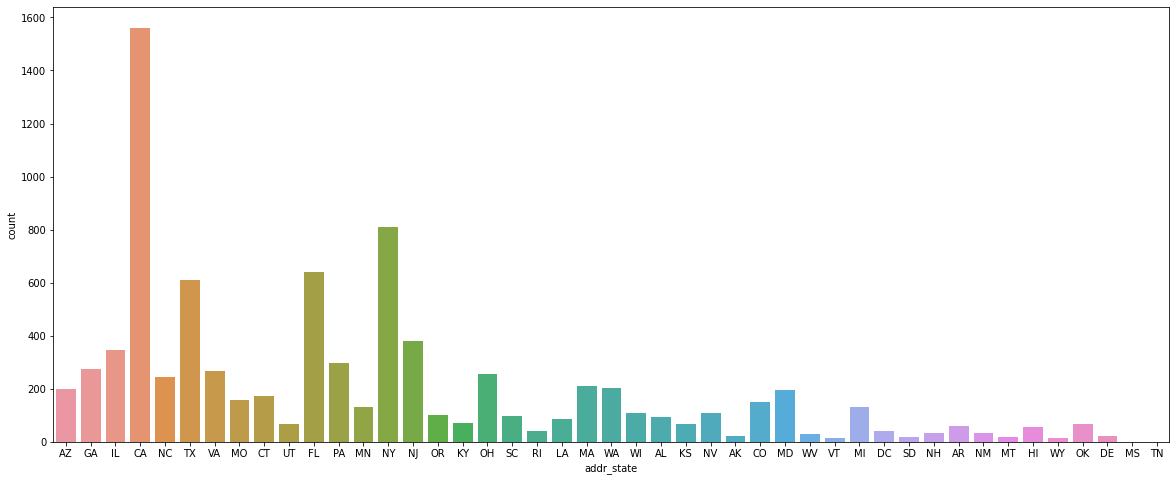

In [27]:
plt.figure(figsize=(20,8))

sns.countplot(data=df,x='addr_state')
plt.show()


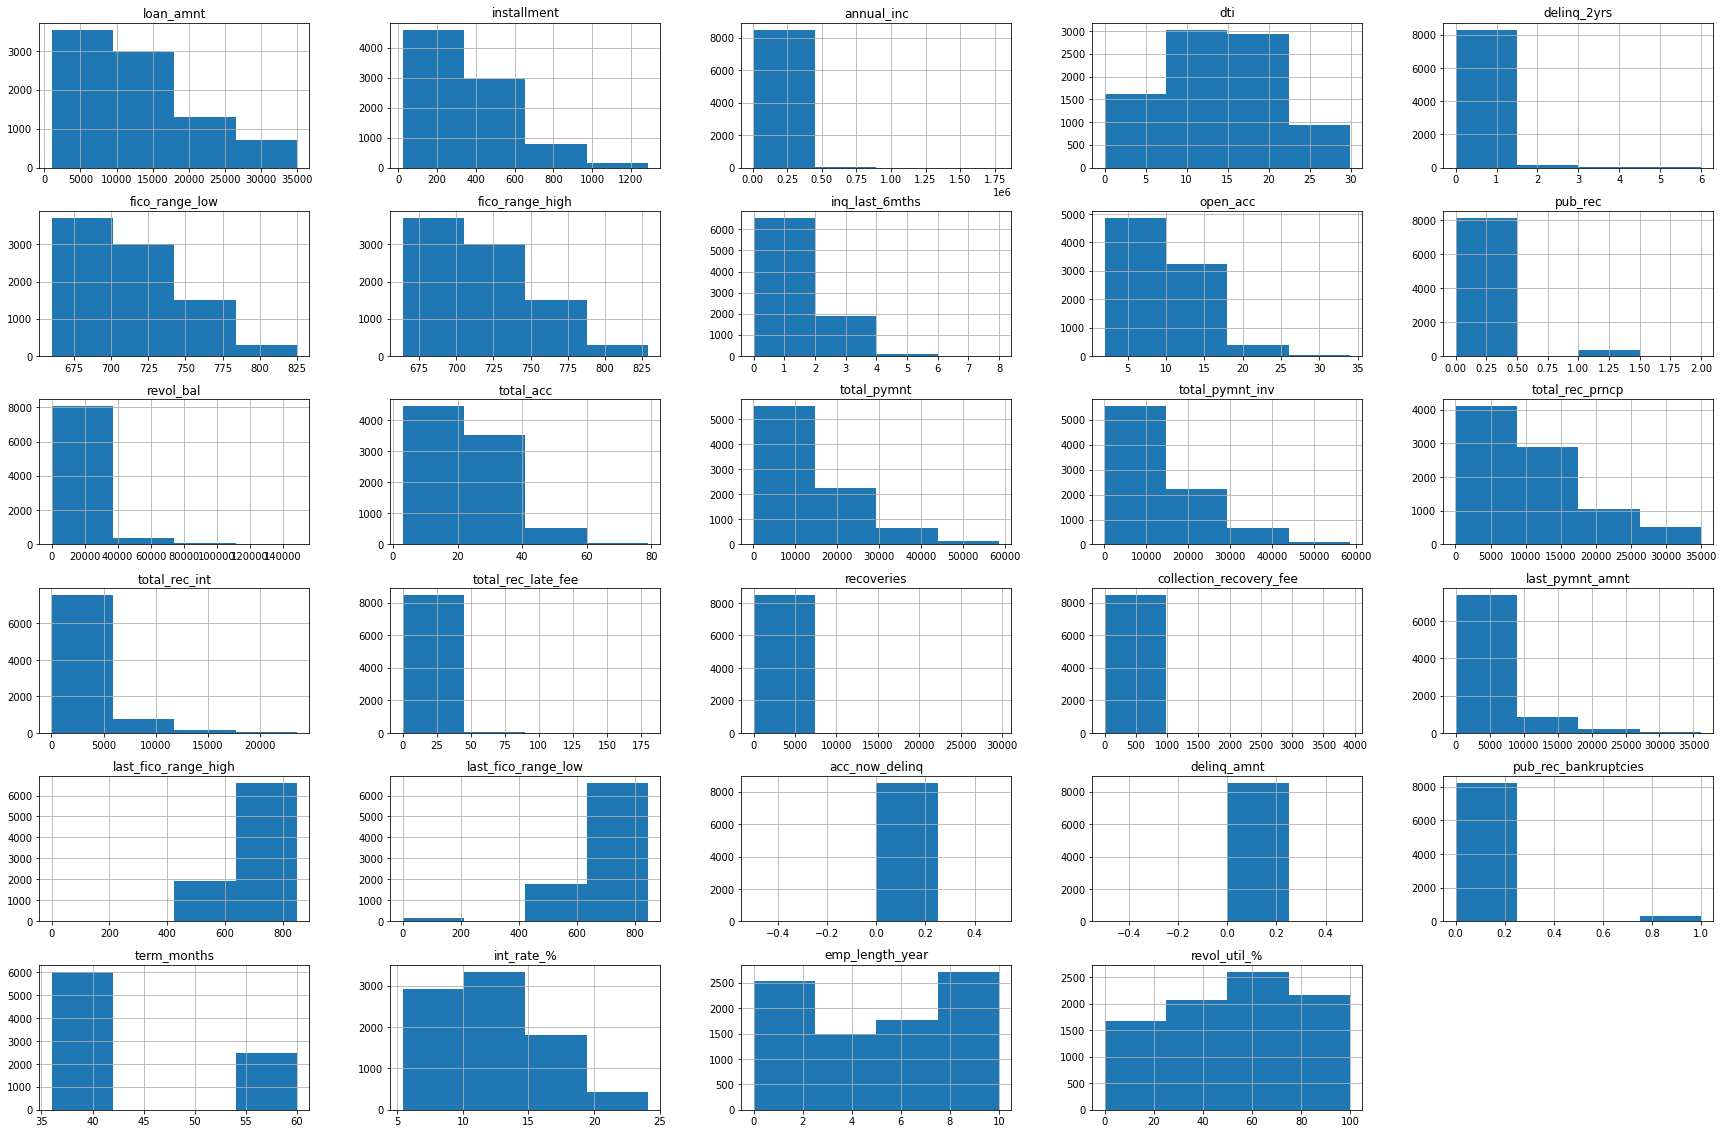

In [28]:
# we can see the observation of each columns
df.hist(bins=4,figsize=(30,20))
plt.show()

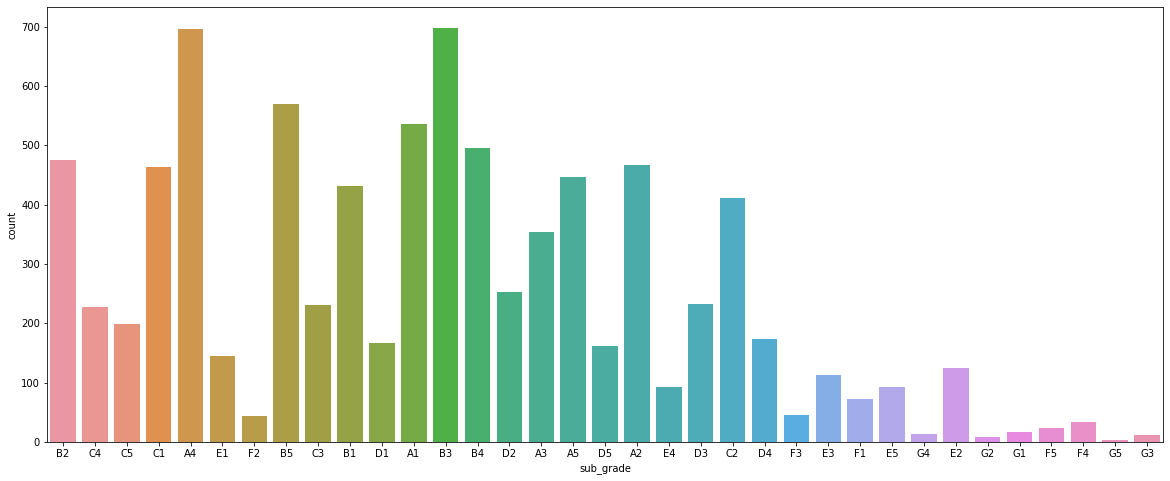

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='sub_grade' )
plt.show()


<Axes: xlabel='application_type', ylabel='count'>

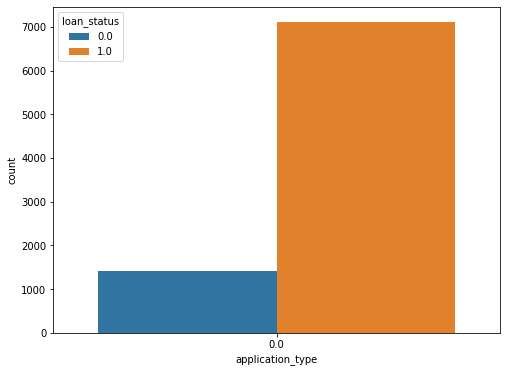

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x="application_type", data=df, hue="loan_status")



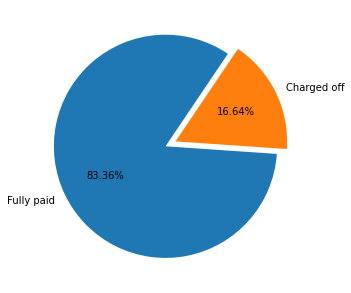

In [30]:
plt.figure(figsize=(5,7))
values = df["loan_status"].value_counts()
plt.pie(values,labels=["Fully paid","Charged off"], explode=(0,0.1), autopct="%.2f%%", startangle=56)
plt.show()


In [31]:
# Data Encording
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['grade','sub_grade','emp_title','home_ownership','verification_status','loan_status','pymnt_plan','purpose','title','addr_state','application_type']]=oe.fit_transform(df[['grade','sub_grade','emp_title','home_ownership','verification_status','loan_status','pymnt_plan','purpose','title','addr_state','application_type']])


In [32]:
df.head()

,loan_amnt,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_fico_range_high,last_fico_range_low,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
0,5000.0,162.87,1.0,6.0,3994.0,2.0,24000.0,2.0,1.0,0.0,...,744.0,740.0,0.0,0.0,0.0,0.0,36.0,10.65,10.0,83.7
1,2500.0,59.83,2.0,13.0,4540.0,2.0,30000.0,1.0,0.0,0.0,...,499.0,0.0,0.0,0.0,0.0,0.0,60.0,15.27,0.0,9.4
2,2400.0,84.33,2.0,14.0,3994.0,2.0,12252.0,0.0,1.0,0.0,...,719.0,715.0,0.0,0.0,0.0,0.0,36.0,15.96,10.0,98.5
3,10000.0,339.31,2.0,10.0,86.0,2.0,49200.0,1.0,1.0,0.0,...,604.0,600.0,0.0,0.0,0.0,0.0,36.0,13.49,10.0,21.0
5,5000.0,156.46,0.0,3.0,5837.0,2.0,36000.0,1.0,1.0,0.0,...,679.0,675.0,0.0,0.0,0.0,0.0,36.0,7.90,3.0,28.3


In [33]:
# Train test split
df.shape 


(8521, 40)

In [34]:
x = df.drop('loan_status', axis=1)


In [35]:
y = df['loan_status']


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [38]:
from sklearn.preprocessing import MinMaxScaler


In [39]:
scaler = MinMaxScaler()


In [40]:
xtrain = scaler.fit_transform(xtrain)


In [41]:
xtest = scaler.transform(xtest)


In [42]:
x.head()

,loan_amnt,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,last_fico_range_high,last_fico_range_low,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,term_months,int_rate_%,emp_length_year,revol_util_%
0,5000.0,162.87,1.0,6.0,3994.0,2.0,24000.0,2.0,0.0,1.0,...,744.0,740.0,0.0,0.0,0.0,0.0,36.0,10.65,10.0,83.7
1,2500.0,59.83,2.0,13.0,4540.0,2.0,30000.0,1.0,0.0,0.0,...,499.0,0.0,0.0,0.0,0.0,0.0,60.0,15.27,0.0,9.4
2,2400.0,84.33,2.0,14.0,3994.0,2.0,12252.0,0.0,0.0,10.0,...,719.0,715.0,0.0,0.0,0.0,0.0,36.0,15.96,10.0,98.5
3,10000.0,339.31,2.0,10.0,86.0,2.0,49200.0,1.0,0.0,8.0,...,604.0,600.0,0.0,0.0,0.0,0.0,36.0,13.49,10.0,21.0
5,5000.0,156.46,0.0,3.0,5837.0,2.0,36000.0,1.0,0.0,12.0,...,679.0,675.0,0.0,0.0,0.0,0.0,36.0,7.90,3.0,28.3


In [43]:
# applying models
#1.Logistic Regression


In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

print(f"Accuracy score:{ac}\nConfusion Matrix:\n{cm}\nClassification report:\n{cr}")


Accuracy score:0.9700879765395894
Confusion Matrix:
[[ 232   47]
 [   4 1422]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       279
         1.0       0.97      1.00      0.98      1426

    accuracy                           0.97      1705
   macro avg       0.98      0.91      0.94      1705
weighted avg       0.97      0.97      0.97      1705



In [46]:
# 2. KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [48]:
tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)
print(f" Training accuracy : {tr}\n Testing accuracy : {te}")

 Training accuracy : 0.9153462441314554
 Testing accuracy : 0.8961876832844575


In [49]:
# Hyperparameter tuning
trainac=[]
testac=[]

for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    traina=knn.score(xtrain,ytrain)
    testa=knn.score(xtest,ytest)
    
    trainac.append(traina)
    testac.append(testa)

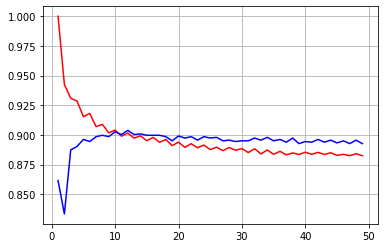

In [50]:
plt.plot(range(1,50),trainac,color="red")
plt.plot(range(1,50),testac,color="blue")
plt.grid()
plt.show()

In [51]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
     
tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)
     
trainac.append(tr)
testac.append(te)
print(f"Training acc: {tr}\nTesting acc:{te}")

        

Training acc: 0.8867370892018779
Testing acc:0.8950146627565982


In [52]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

print(f"Accuracy score:{ac}\nConfusion Matrix:\n{cm}\nClassification report:\n{cr}")


Accuracy score:0.8950146627565982
Confusion Matrix:
[[ 105  174]
 [   5 1421]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.38      0.54       279
         1.0       0.89      1.00      0.94      1426

    accuracy                           0.90      1705
   macro avg       0.92      0.69      0.74      1705
weighted avg       0.90      0.90      0.88      1705



In [53]:
# SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)


In [54]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

print(f"Accuracy score:{ac}\nConfusion Matrix:\n{cm}\nClassification report:\n{cr}")


Accuracy score:0.9683284457478006
Confusion Matrix:
[[ 227   52]
 [   2 1424]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89       279
         1.0       0.96      1.00      0.98      1426

    accuracy                           0.97      1705
   macro avg       0.98      0.91      0.94      1705
weighted avg       0.97      0.97      0.97      1705



In [55]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)

In [57]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

print(f"Accuracy score:{ac}\nConfusion Matrix:\n{cm}\nClassification report:\n{cr}")


Accuracy score:0.9577712609970674
Confusion Matrix:
[[ 218   61]
 [  11 1415]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       279
         1.0       0.96      0.99      0.98      1426

    accuracy                           0.96      1705
   macro avg       0.96      0.89      0.92      1705
weighted avg       0.96      0.96      0.96      1705



In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [59]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

print(f"Accuracy score:{ac}\nConfusion Matrix:\n{cm}\nClassification report:\n{cr}")


Accuracy score:0.9912023460410557
Confusion Matrix:
[[ 272    7]
 [   8 1418]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       279
         1.0       1.00      0.99      0.99      1426

    accuracy                           0.99      1705
   macro avg       0.98      0.98      0.98      1705
weighted avg       0.99      0.99      0.99      1705



In [60]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=70,max_depth=50) #giving depth to decision tree
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)


In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

print(f"Accuracy score:{ac}\nConfusion Matrix:\n{cm}\nClassification report:\n{cr}")


Accuracy score:0.9917888563049854
Confusion Matrix:
[[ 265   14]
 [   0 1426]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       279
         1.0       0.99      1.00      1.00      1426

    accuracy                           0.99      1705
   macro avg       1.00      0.97      0.98      1705
weighted avg       0.99      0.99      0.99      1705

